In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

In [6]:
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', ' ').str.strip()

In [7]:
df_rf = df.drop(columns=["Entity", "Year", "Density\\n(P/Km2)"], errors='ignore')

In [8]:
df_rf = df_rf.dropna()

In [9]:
target_col = "Access to electricity (% of population)"
X = df_rf.drop(columns=[target_col])
y = df_rf[target_col]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 6.03
R² Score: 0.97


In [14]:
# Feature importance plot
importances = rf.feature_importances_
feature_names = X.columns


In [15]:
# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

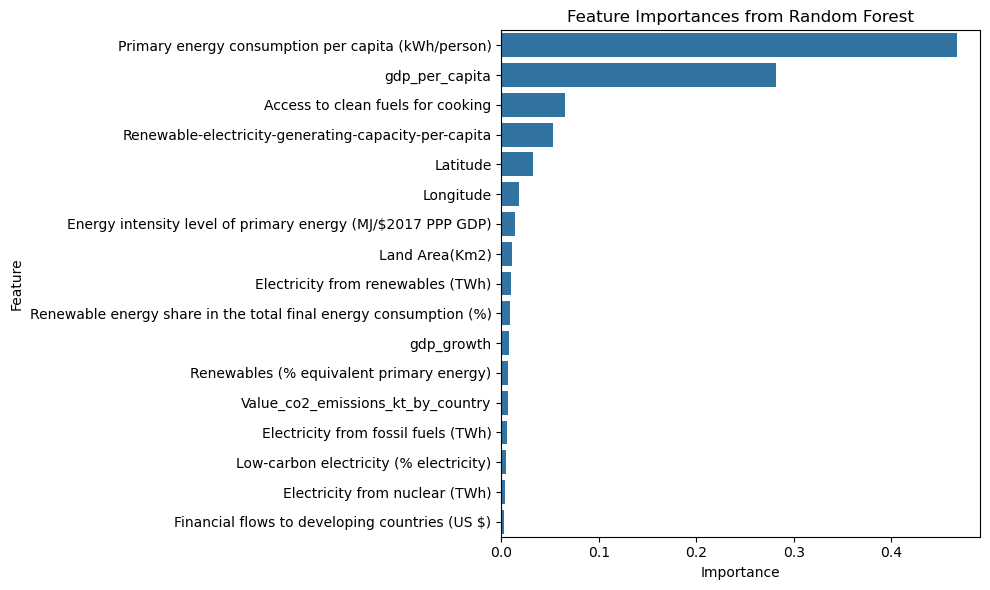

In [17]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()